In [1]:
import os
import sys
sys.path.append('../')
sys.path.append('../brisque')
print(sys.path)

import cv2
from brisque import BRISQUE
from utilities import root_path

['', '/home/akbar/dev/ml/pybrisque/venv/lib/python36.zip', '/home/akbar/dev/ml/pybrisque/venv/lib/python3.6', '/home/akbar/dev/ml/pybrisque/venv/lib/python3.6/lib-dynload', '/usr/lib/python3.6', '/home/akbar/dev/ml/pybrisque/venv/lib/python3.6/site-packages', '/home/akbar/dev/ml/pybrisque/venv/src/libsvm-python', '/home/akbar/dev/ml/pybrisque/venv/src/matlab-imresize', '/home/akbar/dev/ml/pybrisque/venv/lib/python3.6/site-packages/IPython/extensions', '/home/akbar/.ipython', '../', '../brisque']


In [2]:
reference_path = root_path('examples', 'I04.BMP')

In [3]:
brisq = BRISQUE()
print('Reference image: %s' % brisq.get_score(reference_path))

Reference image: 52.152420808504644


In [4]:
brisq.get_feature(reference_path)

array([ 2.179     ,  0.30403122,  0.731     ,  0.04735617,  0.0775647 ,
        0.12390786,  0.733     ,  0.033359  ,  0.08520863,  0.11808305,
        0.732     , -0.01939333,  0.11141596,  0.09223637,  0.729     ,
       -0.02168182,  0.11353836,  0.09197279,  2.089     ,  0.35843565,
        0.715     , -0.04460751,  0.17456574,  0.12112696,  0.72      ,
       -0.03951104,  0.1738377 ,  0.12622814,  0.727     , -0.0324385 ,
        0.16235606,  0.12424927,  0.729     , -0.02929667,  0.15802747,
        0.1239125 ])

# Comparing Matlab Result vs Ours

In [22]:
with open('matlab_result.txt') as f:
    content = f.readlines()

images = {}
for x in content:
    images[x.strip().split(':')[0]]  = float(x.strip().split(':')[1])

In [27]:
matlab_score = list(images.values())
ours = []
for image in images:
    ours.append(brisq.get_score(image))

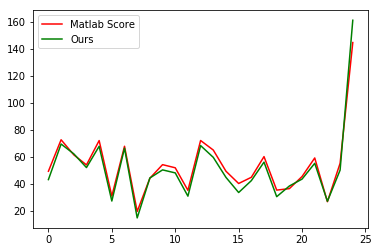

In [42]:
import matplotlib.pyplot as plt

h = {}
h['matlab'] ,= plt.plot(list(range(len(ours))), matlab_score, color='r')
h['ours'] ,= plt.plot(list(range(len(ours))), ours, color='g')
plt.legend([h['matlab'], h['ours']], ['Matlab Score', 'Ours'])
plt.show()

In [36]:
import numpy as np

def describe(arr):
    return {'min': np.min(arr), 'max': np.max(arr), 'mean': np.mean(arr), 'std': np.std(arr)}

describe(np.abs(np.array(matlab_score)- np.array(ours)))

{'min': 0.17222238726479588,
 'max': 16.544924728934404,
 'mean': 3.9994322498322754,
 'std': 3.0715344507521416}